# Primjene singularne dekompozicije matrice


### Uvod

Ekudativna Jupyter bilježnica prikazuje najčešće primjene singularne dekompozicije matrice. Pobliže je definirana i objašnjena dekompozicija na singularne vrijednosti. Također, bilježnica sadrži i dijelovi s programskim kodom pomoću kojeg su prikazani primjeri primjene singularne dekompozicije kao i jedan konkretan primjer njenog računanja. Programski kod će ovisiti o uobičajenim bibliotekama za znanstvenu primjenu Pythona (Numpy, Scipy, Matplotlib i slično). 

### Singularna dekompozicija matrice

Singularna dekompozicija matrice metoda je faktorizacije u linearnoj algebri. 
    
##### Definicija SVD dekompozicije - tvrdnja teorema 
Teorem 1. (SVD) Neka su $m$ i $n$ $(m \geqslant n)$ prirodni brojevi te $M$ proizvoljna $m$ x $n$ realna matrica. Tada postoji dekompozicija $M=U\Sigma$$V^T$, gdje je $U$ ortogonalna $m$ x $n$ matrica i $V$ ortogonalna $n$ x $n$ matrica, a $\sum= $diag$(\sigma_1,\sigma_2,\dots ,\sigma_n)$, sa $\sigma_1\geqslant\sigma_2\geqslant\dots\geqslant\sigma_n\geqslant0$.

Definicija 1. Stupce matrice $U=[u_1,…,u_n]$ nazivamo lijevi singularni vektori, a stupce matrice $V=[v_1,…,v_n]$ nazivamo desni singularni vektori. Brojeve $\sigma_i$ nazivamo singularne vrijednosti.

Uz uvedene oznake lako se vidi da vrijedi $M=U\Sigma$$V^T$ $=$ $\sum_{i=0}^{n}$ $σ_iu_iv^T_i$ .

Napomena 1. U slučaju kada je $m<n$, SVD definiramo za matricu $M^T$.

##### Vizualizacija komponenata 
<img src="vizualizacija.jpg">

Slika 1. - $V^*$ označava $V^T$

##### Primjer izračuna komponenata U, Σ, $V^T$ pomoću numpy biblioteka za zadanu matricu

In [122]:
import numpy as np
from numpy.linalg import svd
from IPython.display import display, Math, Latex


def print_matrix(matrix):
    data = ''
    for row in matrix:        
        if len(row) == 1:
            data += ' %.2f &'%row + r' \\' + '\n'
            continue
        for element in row:
            data += ' %.2f &'%element
        data += r' \\' + '\n'
    display(Math('\\begin{bmatrix} \n%s\end{bmatrix}'%data))

    
R = int(input("Enter the number of rows:")) 
C = int(input("Enter the number of columns:")) 
  
matrix = [] 
print("Enter the entries rowwise one by one:") 
  
for i in range(R):  
    a =[] 
    for j in range(C): 
         a.append(int(input())) 
    matrix.append(a) 
    
U, S, VT = svd(matrix, 0)
startingMatrix = U @ np.diag(S) @ VT

print()
print("Left singular vectors:")
print_matrix(U)

print()
print("Singular values:") 
print_matrix(np.diag(S))

print()
print("Right singular vectors:") 
print_matrix(VT)

print()
print("Matrix gotten by multiplication of components:")
print_matrix(startingMatrix)

Enter the number of rows:3
Enter the number of columns:3
Enter the entries rowwise one by one:
1
0
1
-1
-2
0
0
1
-1

Left singular vectors:


<IPython.core.display.Math object>


Singular values:


<IPython.core.display.Math object>


Right singular vectors:


<IPython.core.display.Math object>


Matrix gotten by multiplication of components:


<IPython.core.display.Math object>

### Primjene singularne dekompozicije matrice 

Matematika je temelj strojnog učenja. Singularna je dekompozicija matrice matematička metoda koja se koristi u raznim primjenama. Nadalje, nedavnim razvojem strojnog učenja, upravljanja podacima i same računarske znanosti singularna dekompozicija matrice je postajala sve važnijim i važnijim alatom. Neke od najčešćih primjena su:
* Kompresija slike
* Osjetljivost sustava linearnih jednadžbi na pogreške u podacima
* Problem najmanjih kvadrata za singularnu matricu M
* Klasifikacija rukom pisanih znamenki
* Sustavi za preporuku

##### Kompresija slike

Sve češće susrećemo pojam 'big data', a razvoj tehnologije i porast broja stanovnika doprinose svakodnevnom stvaranju hrpe podataka. Podatke je potrebno obraditi, slati i spremati. Upravo zbog toga bilo je nužno osmisliti efikasan način za spremanje podataka kako bi oni zauzimali što manje, a glavna informacija sačuvana. Odgovor je kompresija digitalne slike. Za učitanu sliku veličine 2048 x 1365 piksela potrebno nam je 2048⋅1365⋅24=67092480 bitova memorije (za pamćenje jednog piksela koristimo 24 bita) što iznosi 8.4 megabajta. Tri matrice moguće je srezati u odnosu na početnih par pojedinačnih vrijednosti te dobiti aproksimaciju kompresirane izvorne slike. Neke je kompresirane slike ljudskom oku gotovo nemoguće razlikovati od originala. 

##### Python kod za kompresiju učitane slike

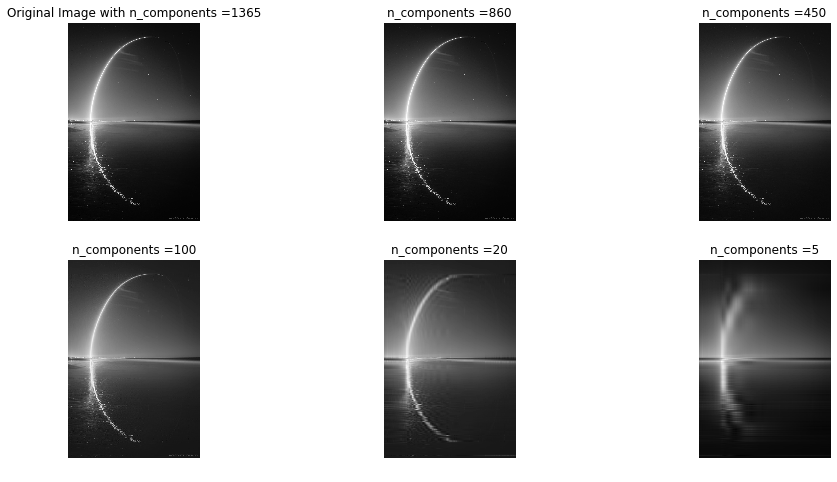

In [123]:
# get the image from "https://i.redd.it/gk1e3rnqn8a41.jpg"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('gk1e3rnqn8a41.jpg', 0)

U, S, VT = np.linalg.svd(img)

comps = [1365, 860, 450, 100, 20, 5]

plt.figure(figsize = (16, 8))

for i in range(6):
  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ VT[:comps[i], :]
  if(i  == 0):
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
  else:
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

Slika 2. korištena za kompresiju

### Postavljanje bilježnice na GitHub

Postavljanje bilježnice na GitHub obavljamo preko službene stranice "https://github.com/new" te je prikazano u par koraka.

###### Koraci izvođenja:
    
    1. Odabiremo ime repozitorija, (neobavezno) mu pridružujemo opis i određujemo mu vidljivost.
    
    2. Klikom na "Upload files" odabiremo mogućnost dodavanja datoteka u repozitorij. 
    
    3. Završetkom odabira datoteka i (neobaveznim) dodavanjem opisa 'commitamo' promjene koje postaju vidljive u repozitoriju 

### Literatura

[I] Willems, K.; Jupyter Notebook Tutorial: The Definitive Guide

< raspoloživo na 
https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook >
    
[II] Singular value decomposition documentation 

< raspoloživo na https://www.mathworks.com/help/matlab/ref/double.svd.html;jsessionid=3d519c97607bed9b1684b22ee2f3 >

[III] Mills, P.; Singular Value Decomposition (SVD) Tutorial: Applications, Examples, Exercises 

< raspoloživo na https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254 >

[IV] Singh, R.; Singular Value Decomposition. Elucidated

< raspoloživo na https://medium.com/data-science-group-iitr/singular-value-decomposition-elucidated-e97005fb82fa >

[V] Novak, A., Pavlović D.; Dekompozicija matrice na singularne vrijednosti i primjene

< raspoloživo na http://e.math.hr/br24/NovakEtAl >

[VI] Slika 1. 

< raspoloživo na https://upload.wikimedia.org/wikipedia/commons/b/bb/Singular-Value-Decomposition.svg > 

[VII] Slika 2., prije kompresije

< raspoloživo na https://i.redd.it/gk1e3rnqn8a41.jpg , www.johnkrausphotos.com >

